# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



# STEP 1: IMPORT LIBRARIES AND DATASET

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train,y_train = train['features'],train['labels']
X_validation,y_validation = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

# STEP 2: IMAGE EXPLORATION

36

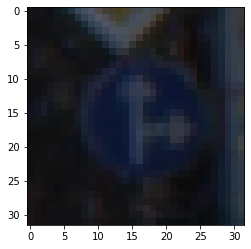

In [5]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

17

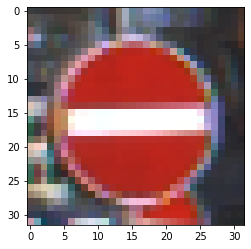

In [6]:
i = 1000
plt.imshow(X_test[i])
y_test[i]

4

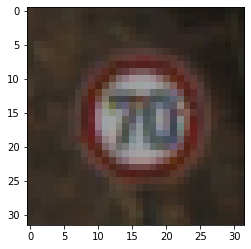

In [7]:
i = 1000
plt.imshow(X_validation[i])
y_validation[i]

# STEP 3: DATA PEPARATION

In [8]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [9]:
X_train_gray = np.sum(X_train/3,axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3,axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3,axis=3, keepdims=True)


In [10]:
X_train_gray.shape

(34799, 32, 32, 1)

In [11]:
X_test_gray.shape


(12630, 32, 32, 1)

In [12]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [13]:
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128

In [14]:
X_train_gray_norm

array([[[[ 0.28125   ],
         [ 0.2734375 ],
         [ 0.27604167],
         ...,
         [ 0.70572917],
         [ 0.70833333],
         [ 0.68489583]],

        [[ 0.28385417],
         [ 0.28385417],
         [ 0.28385417],
         ...,
         [ 0.77083333],
         [ 0.77864583],
         [ 0.7421875 ]],

        [[ 0.2890625 ],
         [ 0.28385417],
         [ 0.27604167],
         ...,
         [ 0.66145833],
         [ 0.65104167],
         [ 0.62239583]],

        ...,

        [[ 0.46614583],
         [ 0.44791667],
         [ 0.44010417],
         ...,
         [ 0.23958333],
         [ 0.22916667],
         [ 0.234375  ]],

        [[ 0.49739583],
         [ 0.4921875 ],
         [ 0.46614583],
         ...,
         [ 0.2265625 ],
         [ 0.2265625 ],
         [ 0.23177083]],

        [[ 0.53645833],
         [ 0.52864583],
         [ 0.51822917],
         ...,
         [ 0.22916667],
         [ 0.21354167],
         [ 0.2109375 ]]],


       [[[ 0.0234375 ],


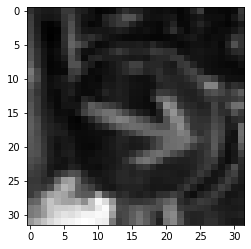

In [15]:
i = 619
plt.imshow(X_test_gray_norm[i].squeeze(),cmap='gray')

# STEP 4: MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



In [17]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120,activation='relu'))

cnn_model.add(Dense(units=84,activation='relu'))

cnn_model.add(Dense(units=43,activation='softmax'))







In [18]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [19]:
history = cnn_model.fit(X_train_gray_norm,y_train,batch_size=500,epochs = 50,verbose=1,validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 7s 103ms/step - loss: 3.1143 - accuracy: 0.1916 - val_loss: 2.4926 - val_accuracy: 0.3506
Epoch 2/50
70/70 [==============================] - 9s 122ms/step - loss: 1.5477 - accuracy: 0.5707 - val_loss: 1.2962 - val_accuracy: 0.6390
Epoch 3/50
70/70 [==============================] - 9s 123ms/step - loss: 0.8710 - accuracy: 0.7535 - val_loss: 0.9459 - val_accuracy: 0.7317
Epoch 4/50
70/70 [==============================] - 10s 145ms/step - loss: 0.6249 - accuracy: 0.8281 - val_loss: 0.7673 - val_accuracy: 0.7755
Epoch 5/50
70/70 [==============================] - 12s 173ms/step - loss: 0.5018 - accuracy: 0.8654 - val_loss: 0.6905 - val_accuracy: 0.8077
Epoch 6/50
70/70 [==============================] - 8s 118ms/step - loss: 0.4222 - accuracy: 0.8896 - val_loss: 0.6382 - val_accuracy: 0.8281
Epoch 7/50
70/70 [==============================] - 8s 116ms/step - loss: 0.3623 - accuracy: 0.9064 - val_loss: 0.6274 - val_accuracy: 0.8249
Epoc

# STEP 5: MODEL EVALUATION

In [20]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy : {:.4f}'.format(score[1]))

395/395 [==============================] - 2s 4ms/step - loss: 1.1582 - accuracy: 0.8724
Test Accuracy : 0.8724


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

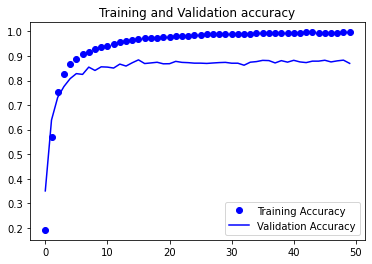

In [22]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()




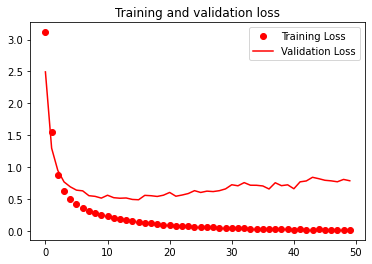

In [23]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<AxesSubplot:>

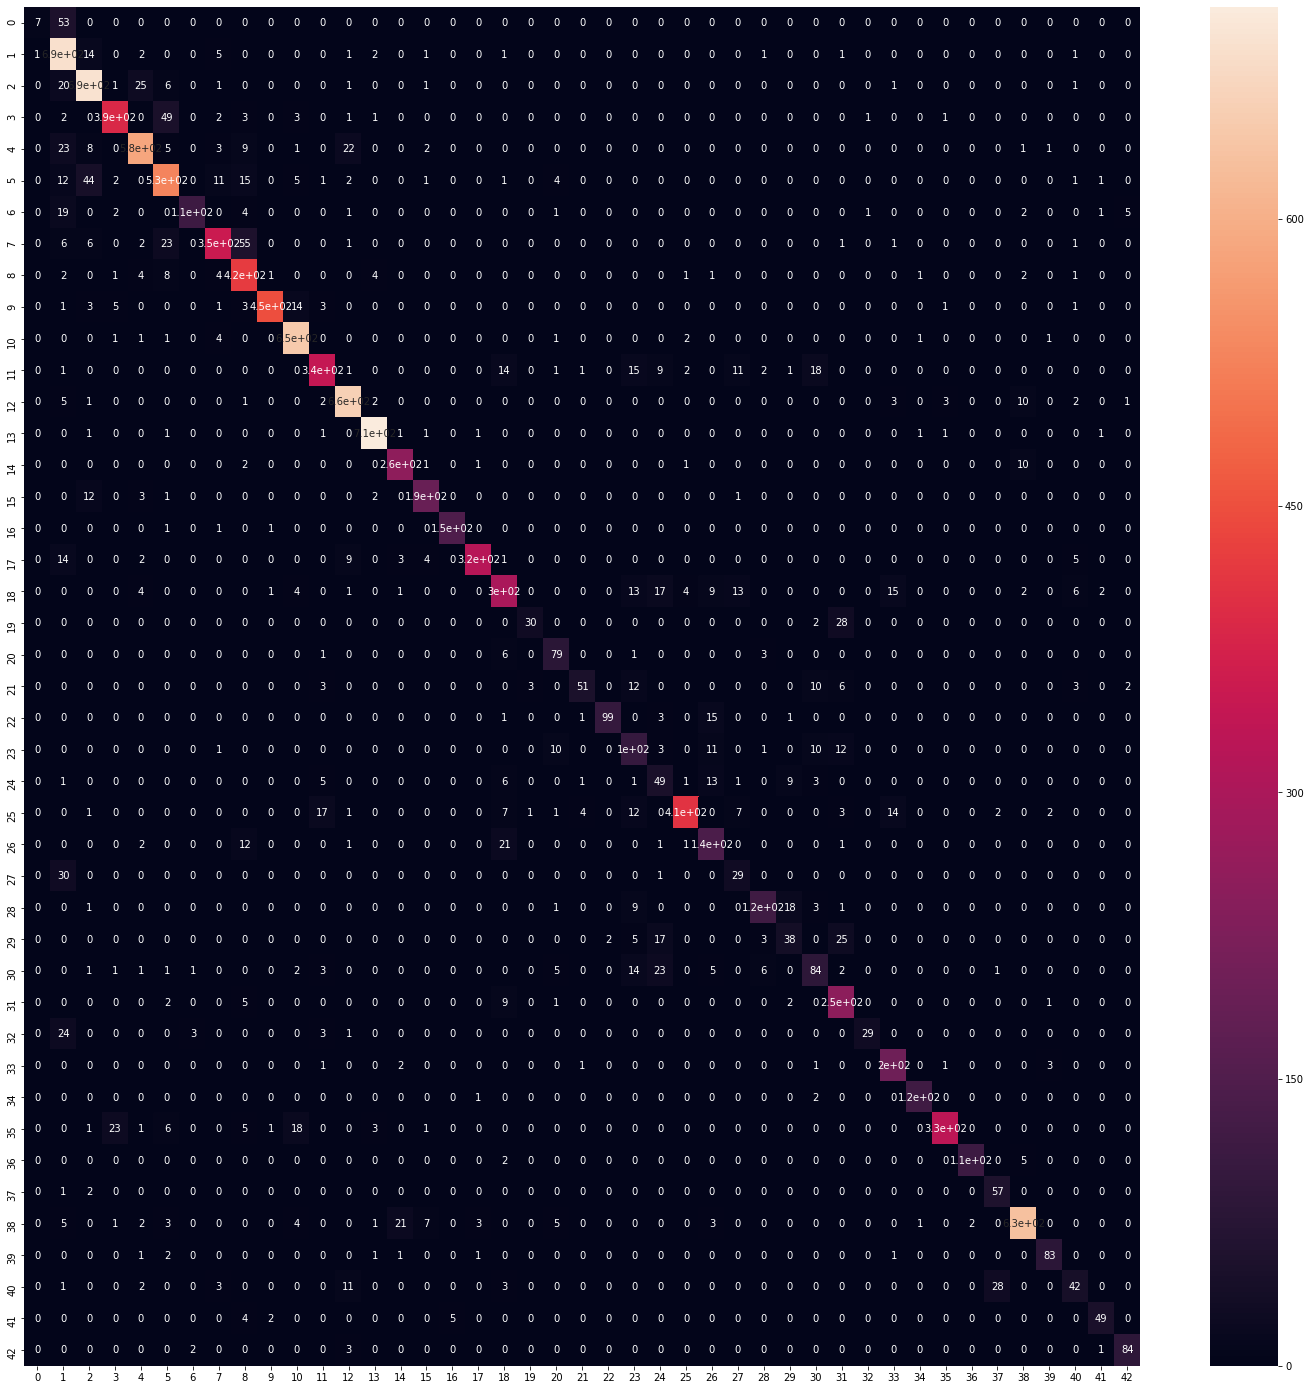

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)


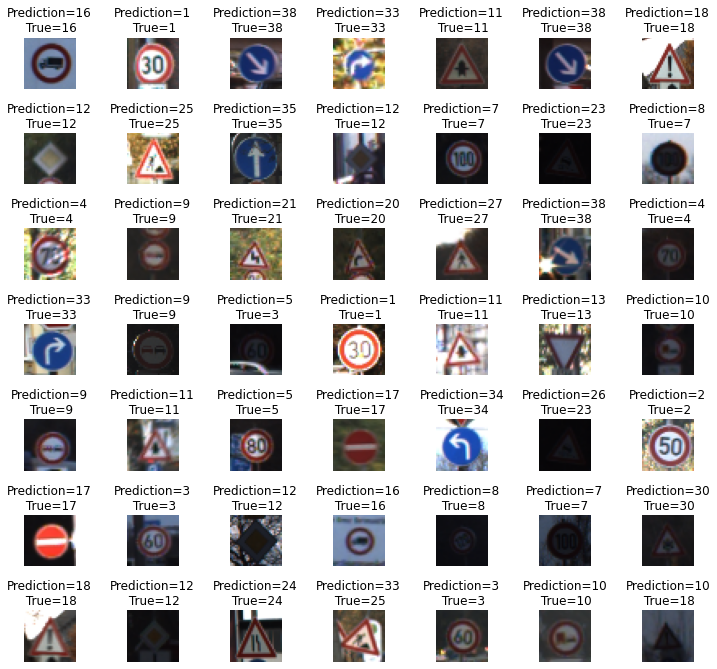

In [26]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)